In [1]:
import os 
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

In [2]:
import nibabel as nib
import pandas as pd

ModuleNotFoundError: No module named 'nibabel'

In [3]:
import tensorflow as tf

2023-04-12 08:39:35.911959: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-12 08:39:36.053459: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-04-12 08:39:36.967272: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /software/spackages/linux-rocky8-x86_64/gcc-9.5.0/cudnn-8.1.0.77-11.2-o55zmcsaca6xrl5uyyaalmxt2nabqytf/lib64:/software/spackages/linux-rocky8-x86_64/gcc-9.5.0/cuda-11.2.2-ud5pedf473of4in4vhulabsyve3snph4/

In [6]:
os.listdir(os.getcwd())

['np_X_data.pickle',
 'Data preprocessing_palmetto.ipynb',
 'Model build.ipynb',
 'MODEL_01.ipynb',
 '3d_brainLoss_class32_1.h5',
 'Y_recognize.pickle',
 '.ipynb_checkpoints',
 'Y_feature.pickle',
 'BSE_BET_DATA',
 'np_data.pickle']

In [7]:
os.chdir(os.getcwd() +'/BSE_BET_DATA')

In [8]:
os.getcwd()

'/home/cbasire/Data Mining/BSE_BET_DATA'

In [9]:
os.listdir(os.getcwd())#+ str('/files')

['labels.csv', 'files']

In [10]:
path1 = '/home/cbasire/Data Mining/BSE_BET_DATA/files/'
path2 = '/home/cbasire/Data Mining/BSE_BET_DATA/files/'

In [11]:
a = list(os.listdir(path1))
a[:5]

['IXI261-HH-1704-T1_bet_04.nii.gz',
 'IXI151-Guys-0793-T1_bet_78.nii.gz',
 'IXI495-Guys-1009-T1_bet_15.nii.gz',
 'IXI644-Guys-1121-T1_bse_less_s6_r1.nii.gz',
 'IXI532-IOP-1145-T1_bet_14.nii.gz']

In [12]:
b = list(os.listdir(path2))
b[:5]

['IXI261-HH-1704-T1_bet_04.nii.gz',
 'IXI151-Guys-0793-T1_bet_78.nii.gz',
 'IXI495-Guys-1009-T1_bet_15.nii.gz',
 'IXI644-Guys-1121-T1_bse_less_s6_r1.nii.gz',
 'IXI532-IOP-1145-T1_bet_14.nii.gz']

(256, 256, 150)


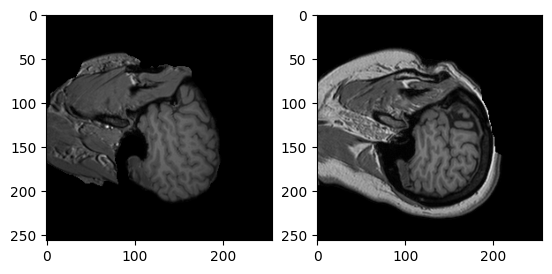

In [17]:
path3 = '/home/cbasire/Data Mining/BSE_BET_DATA/files/IXI049-HH-1358-T1_bet_18.nii.gz'
path4 = '/home/cbasire/Data Mining/BSE_BET_DATA/files/IXI369-Guys-0924-T1_bet_03.nii.gz'
img2 = nib.load(path3).get_fdata()
img3 = nib.load(path4).get_fdata()
#img3 = ndimage.rotate(img3, 360, reshape=False)
print(img2.shape)
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.imshow(np.squeeze(img2[:, :, 32]),cmap = 'gray')
ax2.imshow(np.squeeze(img3[:, :, 32]),cmap = 'gray')
fig.show()

In [18]:
import matplotlib.pyplot as plt

(256, 256, 150)


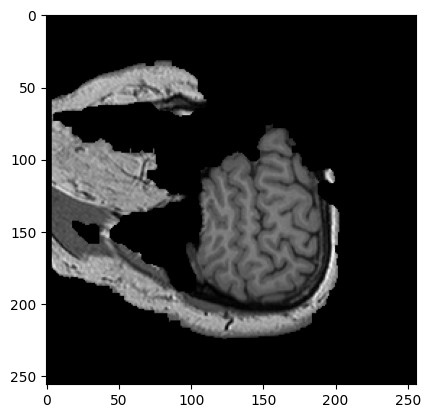

In [31]:
img = nib.load(os.path.join(path1, 'IXI644-Guys-1121-T1_bse_less_s6_r1.nii.gz')).get_fdata()
print(img.shape)
plt.imshow(np.squeeze(img[:, :, 30]),cmap = 'gray')

In [20]:
for i in os.listdir(path):
    img = nib.load(os.path.join(path , i)).get_fdata()
    print(img.shape)

NameError: name 'path' is not defined

(256, 256, 150)
(128, 128)


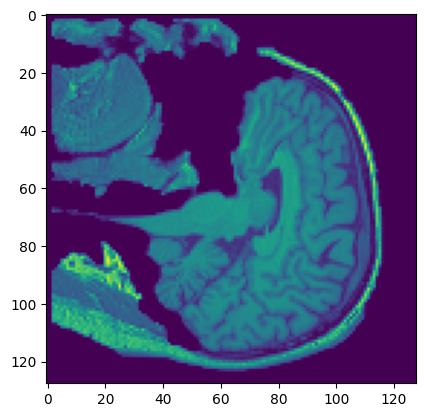

In [33]:
depth_factor = 1 / (img.shape[-1] / 64)
width_factor = 1 / (img.shape[0] / 128)
height_factor = 1 / (img.shape[1] / 128)
#img = img[:,:,30]
print(img.shape)
img = ndimage.zoom(img, (width_factor, height_factor,depth_factor), order=1)
#plt.imshow(np.squeeze(img[:, :, 30]),cmap = 'gray')
img = img[:,:,30]
plt.imshow(img)

print(img.shape)

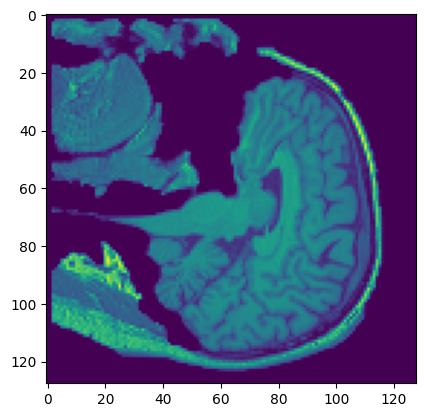

In [24]:
tf.expand_dims(img, axis=2)

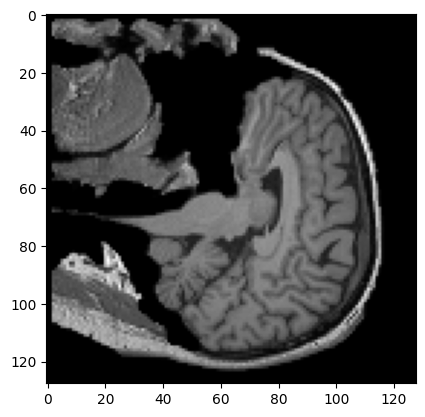

In [41]:
plt.imshow(np.squeeze(img[:, :, 30]),cmap = 'gray')

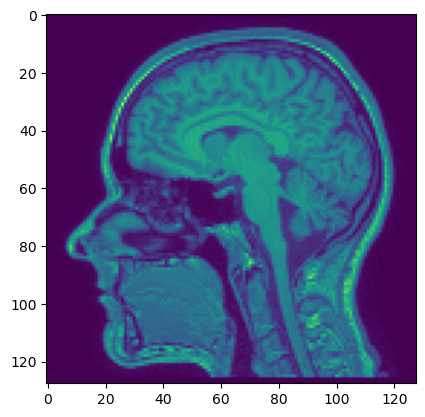

In [77]:
img = ndimage.rotate(img, 90, reshape=False)
plt.imshow(img[:,:,30])

In [48]:
train_loader = tf.data.Dataset.from_tensor_slices((X_train, y_train)

In [47]:
print(tf.__version__)

2.10.0


In [32]:
df = pd.read_csv(path)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x96 in position 46: invalid start byte

In [11]:
angle = [-20, 20]
ndimage.rotate(img, angle, reshape=False)

RuntimeError: no proper affine matrix provided

In [13]:
img.shape

(256, 256, 150)

In [1]:
a = 1 / 256 / 128
a

3.0517578125e-05

In [2]:
1 / 2/4

0.125

In [2]:
a * 256

0.0078125

In [4]:
from tensorflow.keras.preprocessing import image